## What requirements does your data has to meet in order to be able to make a prediction?

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy
import seaborn as sns
%matplotlib inline


You can get data from online sources, or store the file on your computer and link to it.

In [9]:
dfWine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")


### Clean the data


#### Make sure there is no missing data


In [10]:
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


The "non-null" means there is no NaN, so this dataset is good in that part

### Machine Learning Algorithms Expect Numbers


this dataset only has numbers, so were good here.

In [11]:
dfWine.columns = ['Alcohol', 'Malic acid', 'ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline','1']

dfWine.sample(10)

,Alcohol,Malic acid,ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,1
41,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
99,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
124,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378
17,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
88,2,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625
138,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
30,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
68,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
35,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
14,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310


### Understanding and visualizing the data

to better understand your data, experiement with creating some graph to visualize the data

In [16]:
totalWine = dfWine.groupby('Alcohol').sum()

<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

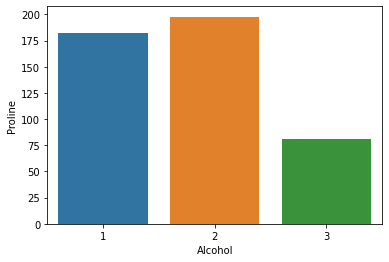

In [20]:
sns.barplot(x=totalWine.index, y=totalWine.Proline)

Here you can see how much each alcohol has proline in it

<AxesSubplot:xlabel='Alcohol', ylabel='Magnesium'>

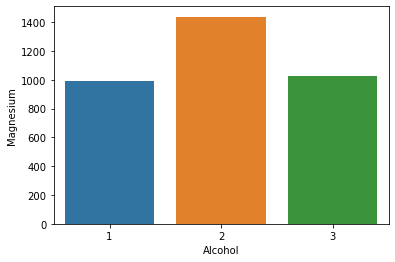

In [21]:
sns.barplot(x=totalWine.index, y=totalWine.Magnesium)

And here how much magnesium in each alcohol

I think graphs like these are readible by most people

## Preparing for ML

we split data into test and train data

In [24]:
X = dfWine[['Alcohol']].values
y = dfWine[['Magnesium']].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)

if you’re preparing a dataset with particular tasks in mind, it’s better to reduce data.

For k-nearest neighbors algorithm you select 2 values

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

you then make a scatter plot

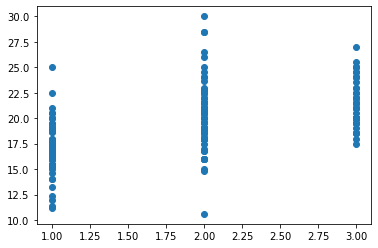

In [28]:
plt.scatter(X,y)

this is probably not the choice of values of the data to perform ml on, but you get the idea

### after this you're ready to feed it into an ML model

Megin van Herk